<a href="https://colab.research.google.com/github/westerlingter/westerlingter/blob/main/DBSCAN_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install basemap ==1.2.0 matplotlib==3.1
%%capture
!pip install -i https://test.pypi.org/simple/ dbscan2==0.0.3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import dbscan
from dbscan2 import dbscan2

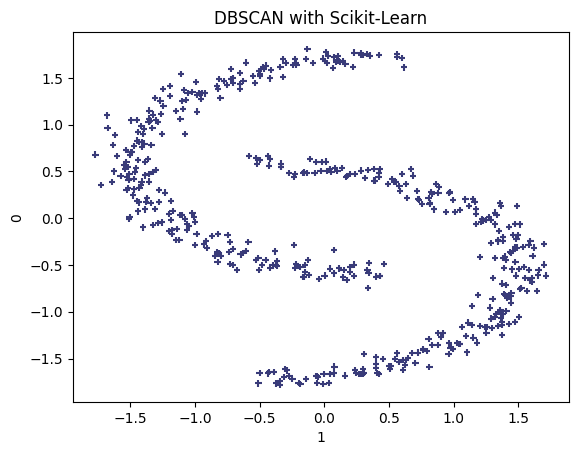

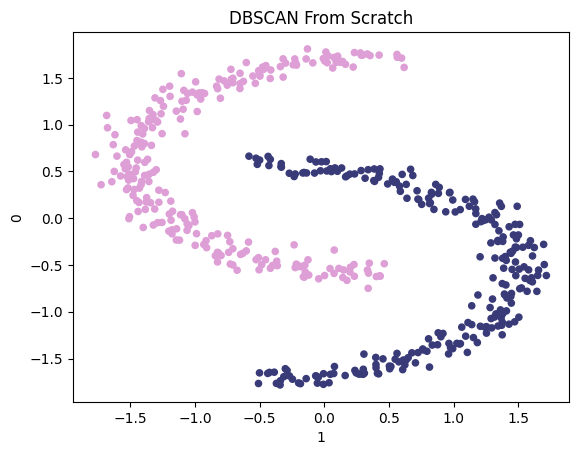

In [ ]:
#
blobs = make_moons(500, noise = 0.06) [0]

epsilon = 0.2
min_points = 5

# standart
for x in range(2):
  m = blobs[:,x].mean()
  s = blobs[:,x].std()

  for y in range(len(blobs)):
      blobs[y,x] = (blobs[y,x] - m)/s

# append label DBSCAN => sama dengan array blobs
sk_dbscan = np.append(blobs, dbscan(blobs, min_points)[1].reshape(-1,1), axis=1)
pd.DataFrame(sk_dbscan).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "DBSCAN with Scikit-Learn", marker="+", colormap="tab20b")

# Buat DBSCAN dari nol (scratch)
test = dbscan2(blobs, epsilon, min_points)
test.fit()
pd.DataFrame(test.df).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "DBSCAN From Scratch", marker="o", colormap="tab20b");